In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
from pygeocoder import Geocoder
import os



In [ ]:
#Filtering down columns
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [2]:
geo_codes = pd.read_csv('Geocodes_USA_with_Counties.csv')
geo_codes

,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,384,NaN
1,544,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,0,NaN
2,601,Adjuntas,PR,18.16,-66.72,Adjuntas,STANDARD,NaN,US,0,0,NaN
3,602,Aguada,PR,18.38,-67.18,NaN,STANDARD,NaN,US,0,0,NaN
4,603,Aguadilla,PR,18.43,-67.15,Aguadilla,STANDARD,NaN,US,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42517,99926,Metlakatla,AK,55.14,-131.49,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,1018,NaN
42518,99927,Point Baker,AK,56.30,-133.57,Prince of Wales-Outer Ketchikan Borough,PO BOX,NaN,US,0,0,NaN
42519,99928,Ward Cove,AK,55.45,-131.79,Ketchikan Gateway Borough,PO BOX,NaN,US,0,1281,NaN
42520,99929,Wrangell,AK,55.95,-131.96,Wrangell Borough,PO BOX,NaN,US,0,1956,NaN


In [21]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [4]:
haz_project_county = haz_project[['state', 'disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
county_project = haz_project_county.dropna()
county_project

,state,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...,...,...
29187,Texas,Potter,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,New Jersey,Atlantic,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,Washington,Pierce,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,New Jersey,Atlantic,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [5]:
with_counties = pd.merge(geo_codes, county_project, on="county")
with_counties

,zip,primary_city,state_x,latitude,longitude,county,type,world_region,country,decommissioned,...,state_y,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,201.2: Relocation of Private Structures - Coas...,5,0,90685.0,68014.0,1.533,190869.0,DR-1296-0038-R
1,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4020.0,800.1: Miscellaneous,1,0,7737.0,5803.0,1.000,1.0,DR-4020-0053-R
2,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,4085.0,403.2: Stormwater Management - Diversions,0,0,564000.0,564000.0,1.517,1067612.0,DR-4085-0010-R
3,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1899.0,200.1: Acquisition of Private Real Property (S...,10,10,2291690.0,1718768.0,1.934,1094385.0,DR-1899-0016-R
4,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,...,New York,1296.0,202.2: Elevation of Private Structures - Coastal,9,2,198574.0,148931.0,1.557,909233.0,DR-1296-0011-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577400,99362,Walla Walla,WA,46.11,-118.30,Walla Walla,STANDARD,NaN,US,0,...,Washington,5182.0,601.2: Generators - Regular,0,0,51000.0,38250.0,2.013,140099.0,DR-5182-0020-R
1577401,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,5090.0,91.5: Local Multijurisdictional Multihazard Mi...,0,0,41212.0,30909.0,0.000,0.0,DR-5090-0001-P
1577402,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1734.0,91.1: Local Multihazard Mitigation Plan,0,0,24693.0,18303.0,0.000,0.0,DR-1734-0020-P
1577403,99363,Wallula,WA,46.06,-118.89,Walla Walla,PO BOX,NaN,US,0,...,Washington,1100.0,200.1: Acquisition of Private Real Property (S...,17,17,1319010.0,989257.0,1.252,946118.0,DR-1100-0016-R


In [31]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']].drop_duplicates(subset="disasterNumber")
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59392,3530,TX,EM,2020,Hurricane
59424,5323,WA,FM,2020,Fire
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [32]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [33]:
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state', 'incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary



numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

In [34]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Fishing Losses         6
Dam/Levee Break        6
Volcano                6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [35]:
storms_df = disaster_sum_clean[disaster_sum_clean["incidentType"] == "Severe Storm(s)"]
storms_df.head(30) 

,disasterNumber,state,declarationType,fyDeclared,incidentType
60,136,OR,DR,1963,Severe Storm(s)
102,104,OK,DR,1960,Severe Storm(s)
130,58,PA,DR,1956,Severe Storm(s)
135,56,NC,DR,1956,Severe Storm(s)
147,61,PA,DR,1956,Severe Storm(s)
175,103,TX,DR,1960,Severe Storm(s)
199,137,WA,DR,1963,Severe Storm(s)
543,198,MO,DR,1965,Severe Storm(s)
1694,285,AL,DR,1970,Severe Storm(s)
1778,281,AK,DR,1970,Severe Storm(s)


In [36]:
storms_merged = pd.merge(county_project, storms_df, on='disasterNumber')
storms_merged

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s)
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s)
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s)
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,California,Riverside,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s)
8964,South Carolina,Statewide,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s)
8965,South Carolina,Statewide,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s)
8966,Washington,Statewide,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s)


In [12]:
storm_summary = storms_merged.groupby(['state_x', 'disasterNumber', 'county', 'projectType', 'projectIdentifier']).mean()
storm_summary.head(50)

numberOfProperties  \
state_x disasterNumber county    projectType                                        projectIdentifier                       
Alabama 856.0          Calhoun   403.4: Stormwater Management - Detention/Retent... DR-0856-0009-R                      0   
                       Etowah    402.1: Infrastructure Protective Measures (Road... DR-0856-0010-R                      0   
                       Madison   103.1: Feasibility, Engineering and Design Studies DR-0856-0007-R                      0   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-0856-0006-F                      0   
                       Sumter    402.1: Infrastructure Protective Measures (Road... DR-0856-0004-R                      0   
        861.0          Autauga   501.1: Other Major Structural Projects             DR-0861-0006-R                      0   
                       Calhoun   403.1: Stormwater Management - Culverts            DR-0861-0023-R                      0   
                       Crenshaw  403.1: Stormwater Management - Culverts            DR-0861-0008-R                      0   
                                                                                    DR-0861-0017-R                      0   
                       Dale      200.1: Acquisition of Private Real Property (St... DR-0861-0013-R                      1   
                       Houston   200.1: Acquisition of Private Real Property (St... DR-0861-0012-R                      3   
                       Jefferson 200.1: Acquisition of Private Real Property (St... DR-0861-0021-R                      0   
                       Limestone 405.1: Other Minor Flood Control                   DR-0861-0018-R                      0   
                       Macon     402.1: Infrastructure Protective Measures (Road... DR-0861-0011-R                      0   
                       Mobile    200.1: Acquisition of Private Real Property (St... DR-0861-0024-R                     11   
        1013.0         Colbert   403.1: Stormwater Management - Culverts            DR-1013-0003-R                      0   
                                 403.2: Stormwater Management - Diversions          DR-1013-0002-R                      0   
                       Crenshaw  403.4: Stormwater Management - Detention/Retent... DR-1013-0014-R                      0   
                       Etowah    403.1: Stormwater Management - Culverts            DR-1013-0004-R                      0   
                       Limestone 400.1: Utility Protective Measures (Electric, G... DR-1013-0005-R                      0   
                                 401.1: Water and Sanitary Sewer System Protecti... DR-1013-0011-R                      0   
                                 402.1: Infrastructure Protective Measures (Road... DR-1013-0010-R                      0   
                       Mobile    200.1: Acquisition of Private Real Property (St... DR-1013-0012-R                      1   
                                                                                    DR-1013-0013-R                      3   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-1013-0001-F                      0   
                                                                                    DR-1013-0008-F                      0   
        1019.0         Calhoun   403.4: Stormwater Management - Detention/Retent... DR-1019-0008-R                      0   
                       DeKalb    200.1: Acquisition of Private Real Property (St... DR-1019-0004-R                     10   
                                                                                    DR-1019-0005-R                      4   
                       Limestone 200.1: Acquisition of Private Real Property (St... DR-1019-0007-R                      2   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-1019-0001-F     

In [13]:
storms_merged["projectType"].nunique()

248

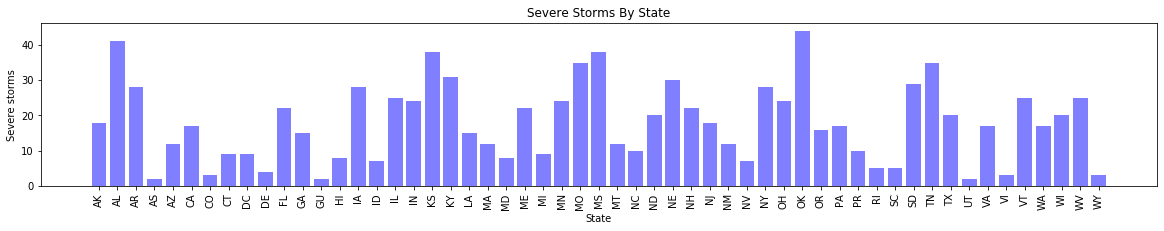

In [37]:
number_storms = storms_df.groupby("state")[["disasterNumber"]].count()
number_storms = number_storms.iloc[:,0]
x_axis = np.arange(len(number_storms))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_storms, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_storms.index, rotation="vertical")
plt.title("Severe Storms By State")
plt.xlabel("State")
plt.ylabel("Severe storms")
plt.show()

In [38]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [60]:
funding_sum = pd.merge(storms_merged, hazard_sum_clean, on="disasterNumber")
#funding_sum = funding_sum.drop_duplicates(subset=["disasterNumber", "projectIdentifier"], keep=False)
funding_sum


,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s),71893494.25
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s),71893494.25
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s),71893494.25
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s),71893494.25
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s),71893494.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,California,Riverside,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s),40833.00
8964,South Carolina,Statewide,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s),36131.00
8965,South Carolina,Statewide,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s),46616.00
8966,Washington,Statewide,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s),259476.00


In [61]:
storm_funds = pd.merge(storms_df, hazard_sum_clean, on="disasterNumber")
storm_funds

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,828,TX,DR,1989,Severe Storm(s),1318742.0
1,838,DC,DR,1989,Severe Storm(s),37400.0
2,839,MD,DR,1989,Severe Storm(s),35435.0
3,856,AL,DR,1990,Severe Storm(s),352454.0
4,857,GA,DR,1990,Severe Storm(s),796538.0
...,...,...,...,...,...,...
895,4550,TN,DR,2020,Severe Storm(s),0.0
896,4551,MS,DR,2020,Severe Storm(s),0.0
897,4552,MO,DR,2020,Severe Storm(s),0.0
898,4554,AL,DR,2020,Severe Storm(s),0.0


In [76]:
storm_funds[disaster_funds["state"] == "IA"].sum()

disasterNumber                                                      72150
state                   IAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIAIA...
declarationType         DRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDRDR...
fyDeclared                                                          54241
incidentType            Severe Storm(s)Severe Storm(s)Severe Storm(s)S...
obligatedTotalAmount                                          3.59639e+08
dtype: object

In [63]:
project_funds = funding_sum.groupby(['state_x', 'disasterNumber', 'county', 'projectType', 'projectIdentifier']).mean()
project_funds

numberOfProperties  \
state_x disasterNumber county    projectType                                        projectIdentifier                       
Alabama 856.0          Calhoun   403.4: Stormwater Management - Detention/Retent... DR-0856-0009-R                      0   
                       Etowah    402.1: Infrastructure Protective Measures (Road... DR-0856-0010-R                      0   
                       Madison   103.1: Feasibility, Engineering and Design Studies DR-0856-0007-R                      0   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-0856-0006-F                      0   
                       Sumter    402.1: Infrastructure Protective Measures (Road... DR-0856-0004-R                      0   
...                                                                                                                   ...   
Wyoming 4007.0         Sheridan  402.1: Infrastructure Protective Measures (Road... DR-4007-0007-R                      0   
                                                                                    DR-4007-0009-R                      0   
                       Statewide 700.4: Management Costs - Supplies                 DR-4007-0005-M                      0   
        4306.0         Statewide 700.4: Management Costs - Supplies                 DR-4306-0003-M                      0   
                       Weston    400.1: Utility Protective Measures (Electric, G... DR-4306-0004-R                      0   

                                                                                                       numberOfFinalProperties  \
state_x disasterNumber county    projectType                                        projectIdentifier                            
Alabama 856.0          Calhoun   403.4: Stormwater Management - Detention/Retent... DR-0856-0009-R                           0   
                       Etowah    402.1: Infrastructure Protective Measures (Road... DR-0856-0010-R                           0   
                       Madison   103.1: Feasibility, Engineering and Design Studies DR-0856-0007-R                           0   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-0856-0006-F                           0   
                       Sumter    402.1: Infrastructure Protective Measures (Road... DR-0856-0004-R                           0   
...                                                                                                                        ...   
Wyoming 4007.0         Sheridan  402.1: Infrastructure Protective Measures (Road... DR-4007-0007-R                           0   
                                                                                    DR-4007-0009-R                           0   
                       Statewide 700.4: Management Costs - Supplies                 DR-4007-0005-M                           0   
        4306.0         Statewide 700.4: Management Costs - Supplies                 DR-4306-0003-M                           0   
                       Weston    400.1: Utility Protective Measures (Electric, G... DR-4306-0004-R                           0   

                                                                                                       projectAmount  \
state_x disasterNumber county    projectType                                        projectIdentifier                  
Alabama 856.0          Calhoun   403.4: Stormwater Management - Detention/Retent... DR-0856-0009-R          120000.0   
                       Etowah    402.1: Infrastructure Protective Measures (Road... DR-0856-0010-R           59750.0   
                       Madison   103.1: Feasibility, Engineering and Design Studies DR-0856-0007-R           50000.0   
                       Statewide 600.1: Warning Systems (as a Component of a Pla... DR-0856-0006-F           45194.0   
                       Sumter    402.1: Infrastructure Protective 

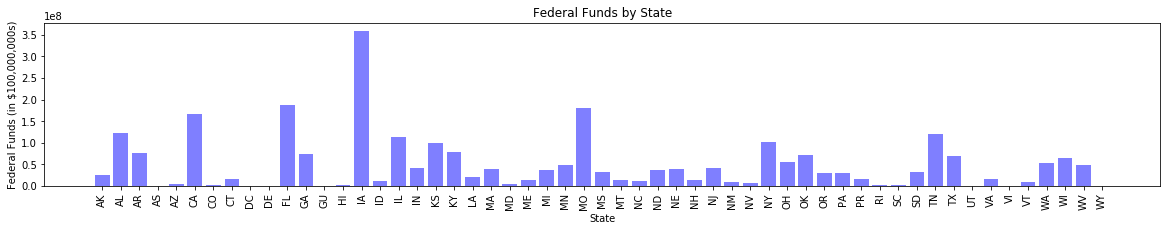

In [81]:
storm_funds_amt = storm_funds.groupby("state")[["obligatedTotalAmount"]].sum()
storm_funds_amt = storm_funds_amt.iloc[:,0]
x_axis = np.arange(len(storm_funds_amt))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, storm_funds_amt, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, storm_funds_amt.index, rotation="vertical")
plt.title("Severe Storm Funds by State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in $100,000,000s)")
plt.show()

In [80]:
il = disaster_funds[disaster_funds["state"] == "I"]
ia["obligatedTotalAmount"].sum()

359639213.55999994

In [43]:
al = funding_sum[funding_sum["state_x"] == "Alabama"]
al

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,Alabama,Morgan,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s),71893494.25
1,Alabama,St. Clair,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s),71893494.25
2,Alabama,Jefferson,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s),71893494.25
3,Alabama,Franklin,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s),71893494.25
4,Alabama,Cullman,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s),71893494.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,Alabama,Etowah,1797.0,206.2: Safe Room (Tornado and Severe Wind Shel...,3,3,93908.0,70431.0,1.451,78724.0,DR-1797-0008-R,AL,DR,2008,Severe Storm(s),1905215.00
8806,Alabama,DeKalb,1797.0,600.1: Warning Systems (as a Component of a Pl...,0,0,135345.0,101509.0,0.000,0.0,DR-1797-0002-F,AL,DR,2008,Severe Storm(s),1905215.00
8807,Alabama,Statewide,1797.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,102055.0,102055.0,0.000,0.0,DR-1797-0010-M,AL,DR,2008,Severe Storm(s),1905215.00
8808,Alabama,Morgan,1797.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,79488.0,59616.0,5.692,523121.0,DR-1797-0003-R,AL,DR,2008,Severe Storm(s),1905215.00


In [56]:
il["obligatedTotalAmount"].sum()

2461749171.61

In [45]:
al["obligatedTotalAmount"].sum()

49043502494.5

In [52]:
no_al = funding_sum[funding_sum["state_x"] != "Alabama"]
no_al_il = no_al[no_al["state_x"] != "Illinois"]
no_al_il

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType,obligatedTotalAmount
670,Mississippi,Quitman,1972.0,601.1: Generators,0,0,32342.0,24257.0,0.000,0.0,DR-1972-0007-F,MS,DR,2011,Severe Storm(s),2809443.0
671,Mississippi,Adams,1972.0,202.3: Elevation of Public Structures - Riverine,1,1,78059.0,52725.0,6.731,519639.0,DR-1972-0019-R,MS,DR,2011,Severe Storm(s),2809443.0
672,Mississippi,Monroe,1972.0,601.1: Generators,0,0,57922.0,43442.0,0.000,0.0,DR-1972-0029-F,MS,DR,2011,Severe Storm(s),2809443.0
673,Mississippi,Simpson,1972.0,601.1: Generators,0,0,40690.0,28773.0,0.000,0.0,DR-1972-0016-F,MS,DR,2011,Severe Storm(s),2809443.0
674,Mississippi,Scott,1972.0,600.1: Warning Systems (as a Component of a Pl...,0,0,98244.0,73683.0,0.000,0.0,DR-1972-0014-F,MS,DR,2011,Severe Storm(s),2809443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,California,Riverside,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s),40833.0
8964,South Carolina,Statewide,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s),36131.0
8965,South Carolina,Statewide,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s),46616.0
8966,Washington,Statewide,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s),259476.0


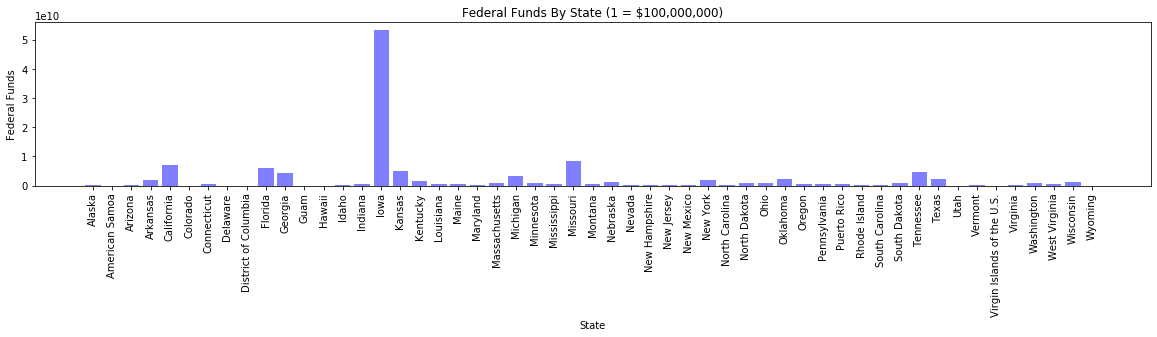

In [53]:
# no_al_il_funds = no_al_il.groupby("state_x")[["obligatedTotalAmount"]].sum()
# no_al_il_funds = no_al_il_funds.iloc[:,0]
# x_axis = np.arange(len(no_al_il_funds))
# tick_place = [value + 0.4 for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, no_al_il_funds, color="b", alpha=0.5, align="edge")
# plt.xticks(tick_place, no_al_il_funds.index, rotation="vertical")
# plt.title("Federal Funds By State")
# plt.xlabel("State")
# plt.ylabel("Federal Funds (in $100,000,000s)")
# plt.show()


In [ ]:
alaska = funding_sum[funding_sum["state_x"] == "Alaska"]
alaska["obligatedTotalAmount"].sum()

In [ ]:
location = [["lat", "lng"]].astype(float)

In [55]:
ia = funding_sum[funding_sum["state_x"] == "Iowa"]
ia["obligatedTotalAmount"].sum()

53257473525.880005

In [ ]:
location = geo_codes_clean[["latitude", "longitude"]].astype(float)

In [ ]:

# maps_url = ("https://maps.googleapis.com/maps/api/geocode/json?"
#                 'address={0}&key={1}').format(target_city, gkey)

# fig = gmaps.figure()

# heatmap_layer = gmaps.heatmap_layer(location, weights=humidity, 
#                                     dissipating=False, max_intensity=100, point_radius = 1)

# fig.add_layer(heatmap_layer)
# fig

In [65]:
huri_df = disaster_sum_clean[disaster_sum_clean["incidentType"] == "Hurricane"]
huri_df

,disasterNumber,state,declarationType,fyDeclared,incidentType
19,23,RI,DR,1954,Hurricane
21,22,MA,DR,1954,Hurricane
22,26,NY,DR,1955,Hurricane
23,24,ME,DR,1954,Hurricane
24,28,NC,DR,1955,Hurricane
...,...,...,...,...,...
59388,3529,HI,EM,2020,Hurricane
59392,3530,TX,EM,2020,Hurricane
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [66]:
huri_merged = pd.merge(county_project, huri_df, on='disasterNumber')
huri_merged

,state_x,county,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state_y,declarationType,fyDeclared,incidentType
0,Alabama,Marion,1866.0,403.1: Stormwater Management - Culverts; \n405...,1,1,96935.0,68156.0,1.211,113059.0,DR-1866-0005-R,AL,DR,2010,Hurricane
1,Alabama,Lawrence,1866.0,206.2: Safe Room (Tornado and Severe Wind Shel...,2,2,72817.0,54613.0,11.904,1140622.0,DR-1866-0013-R,AL,DR,2010,Hurricane
2,Alabama,Lawrence,1866.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,74712.0,56034.0,7.951,835808.0,DR-1866-0006-R,AL,DR,2010,Hurricane
3,Alabama,Statewide,1866.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,69260.0,69260.0,0.000,0.0,DR-1866-0016-M,AL,DR,2010,Hurricane
4,Alabama,Blount,1866.0,600.1: Warning Systems (as a Component of a Pl...,0,0,20764.0,15573.0,0.000,0.0,DR-1866-0003-F,AL,DR,2010,Hurricane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,Virginia,Newport News (city),4411.0,500.3: Flood Control - Dam,1,0,2510440.0,941415.0,1.299,3260681.0,DR-4411-0010-R,VA,DR,2019,Hurricane
5639,Alabama,Cherokee,4406.0,91.4: Local Multijurisdictional Multihazard Mi...,0,0,180000.0,135000.0,0.000,0.0,DR-4406-0006-P,AL,DR,2019,Hurricane
5640,Alabama,Geneva,4406.0,601.1: Generators,0,0,102368.0,76776.0,2.682,405878.0,DR-4406-0009-R,AL,DR,2019,Hurricane
5641,Alabama,Mobile,4406.0,601.1: Generators,0,0,37140.0,27855.0,1.191,51906.0,DR-4406-0004-R,AL,DR,2019,Hurricane


In [67]:
huri_summary = huri_merged.groupby(['state_x', 'disasterNumber', 'county', 'projectType', 'projectIdentifier']).mean()
huri_summary.head(50)

numberOfProperties  \
state_x disasterNumber county     projectType                                        projectIdentifier                       
Alabama 1070.0         Baldwin    200.1: Acquisition of Private Real Property (St... DR-1070-0015-R                      1   
                                                                                     DR-1070-0019-R                      4   
                                  202.1: Elevation of Private Structures - Riverine  DR-1070-0016-R                      8   
                       Calhoun    200.1: Acquisition of Private Real Property (St... DR-1070-0004-R                     42   
                                                                                     DR-1070-0018-R                     29   
                                  403.4: Stormwater Management - Detention/Retent... DR-1070-0023-R                      0   
                       Etowah     402.1: Infrastructure Protective Measures (Road... DR-1070-0020-R                      0   
                       Geneva     200.1: Acquisition of Private Real Property (St... DR-1070-0010-R                     10   
                       Jefferson  200.1: Acquisition of Private Real Property (St... DR-1070-0003-R                    284   
                       Macon      301.1: Shoreline Stabilization (Riprap, etc.)      DR-1070-0001-R                      0   
                       Montgomery 403.1: Stormwater Management - Culverts            DR-1070-0002-R                      0   
                       Statewide  600.1: Warning Systems (as a Component of a Pla... DR-1070-0013-F                      0   
                                  700.1: Management Costs - Salaries                 DR-1070-M001-M                      0   
                                  90.6: Mitigation Plan - State Multihazard Mitig... DR-1070-0012-F                      0   
                       Talladega  401.1: Water and Sanitary Sewer System Protecti... DR-1070-0007-R                      0   
                                  403.1: Stormwater Management - Culverts            DR-1070-0024-R                      0   
        1250.0         Autauga    200.1: Acquisition of Private Real Property (St... DR-1250-0004-R                      5   
                       Barbour    103.1: Feasibility, Engineering and Design Studies DR-1250-0011-R                      0   
                       Calhoun    403.4: Stormwater Management - Detention/Retent... DR-1250-0008-R                      0   
                       Crenshaw   403.1: Stormwater Management - Culverts            DR-1250-0016-R                      0   
                       Dale       200.3: Acquisition of Public Real Property (Str... DR-1250-0005-R                      1   
                       DeKalb     103.1: Feasibility, Engineering and Design Studies DR-1250-0015-R                      0   
                       Geneva     200.1: Acquisition of Private Real Property (St... DR-1250-0024-R                      5   
                       Jefferson  200.1: Acquisition of Private Real Property (St... DR-1250-0020-R                     68   
                                                                                     DR-1250-0021-R                      1   
                                                                                     DR-1250-0022-R                      7   
                                                                                     DR-1250-0026-R                      1   
                                  200.3: Acquisition of Public Real Property (Str... DR-1250-0010-R                      2   
                                  90.4: Mitigation Plan - Local Multihazard Mitig... DR-1250-0007-F                      0   
                       Lee        103.1: Feasibility, Engineering and Design Studies DR-1250-0018-R                      0   
                                  200.1: Acquisition of Private Real Pro

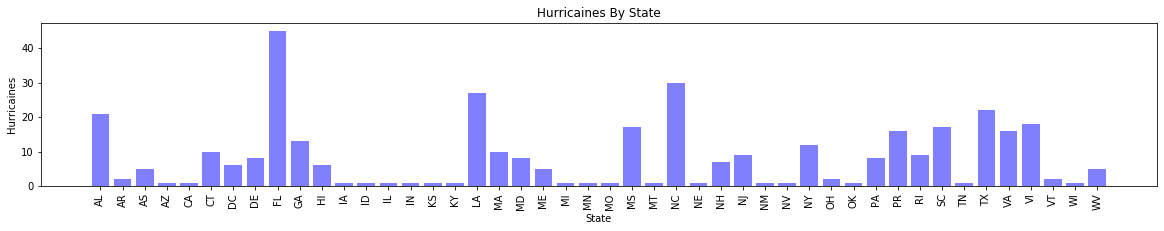

In [74]:
number_huri = huri_df.groupby("state")[["disasterNumber"]].count()
number_huri = number_huri.iloc[:,0]
x_axis = np.arange(len(number_huri))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_huri, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_huri.index, rotation="vertical")
plt.title("Hurricaines By State")
plt.xlabel("State")
plt.ylabel("Hurricaines")
plt.show()

In [83]:
huri_funds = pd.merge(huri_df, hazard_sum_clean, on="disasterNumber")
#funding_sum = funding_sum.drop_duplicates(subset=["disasterNumber", "projectIdentifier"], keep=False)
huri_funds


,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,842,PR,DR,1989,Hurricane,5656728.0
1,841,VI,DR,1989,Hurricane,17476958.0
2,843,SC,DR,1989,Hurricane,11090956.0
3,844,NC,DR,1989,Hurricane,2032964.0
4,855,AS,DR,1990,Hurricane,2792331.0
...,...,...,...,...,...,...
165,4357,AS,DR,2018,Hurricane,733000.5
166,4458,LA,DR,2019,Hurricane,0.0
167,4464,SC,DR,2019,Hurricane,141016.0
168,4465,NC,DR,2020,Hurricane,0.0


In [93]:
huri_project_funds = huri_funds.groupby(['state', 'disasterNumber', 'projectType', 'projectIdentifier']).mean()
huri_project_funds

KeyError: 'projectType'

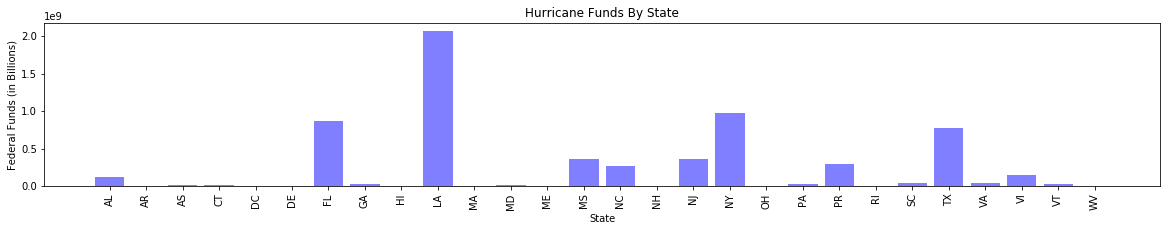

In [90]:
huri_number_funds = huri_funds.groupby("state")[["obligatedTotalAmount"]].sum()
huri_number_funds = huri_number_funds.iloc[:,0]
x_axis = np.arange(len(huri_number_funds))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, huri_number_funds, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, huri_number_funds.index, rotation="vertical")
plt.title("Hurricane Funds By State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in Billions)")
plt.show()

In [89]:
ia = huri_funds[huri_funds["state"] == "LA"]
ia["obligatedTotalAmount"].sum()

2072859527.52